In [1]:
import dognet
from dognet import DoGNet

In [9]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import torch 
import numpy as np 

model = DoGNet(num_classes=43)
# print(torch.load('../best_model_GT (7).pth'))
model = torch.load('../best_model_GT (7).pth')
target_layers = [model.conv9]

input_tensor = torch.randn((1, 3, 224, 224))

# We have to specify the target we want to generate the CAM for.
targets = [ClassifierOutputTarget(2)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
  # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
  # In this example grayscale_cam has only one image in the batch:
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(np.random.rand(224, 224, 3), grayscale_cam, use_rgb=True)
  # You can also get the model outputs without having to redo inference
  model_outputs = cam.outputs

/tmp/ipykernel_7545/1558792774.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('../best_model_GT (7).pth')


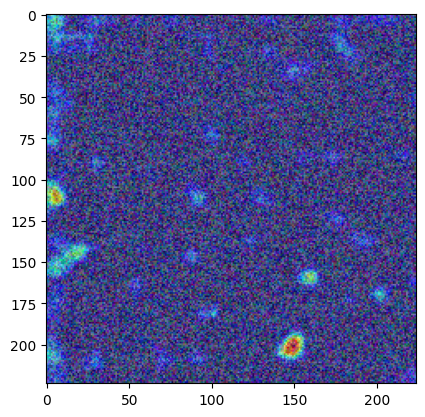

In [10]:
import matplotlib.pyplot as plt 

plt.imshow(visualization)

In [2]:
import os
import cv2
import torch

import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import torch.nn            as nn
import torch.nn.functional as F
import torch.optim         as optim

from PIL                     import Image
from torch.utils.data        import Dataset, DataLoader
from torchvision.transforms  import v2
from sklearn.model_selection import train_test_split

class GTSRBDataset(Dataset):
    def __init__(self, data_dir, df, transform=None) -> None:
        super().__init__()
        self.df = pd.read_csv(df)
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        item = self.df.iloc[index]
        label = item['ClassId']
        
        path = os.path.join(self.data_dir, item['Path'])
        image = Image.open(path).convert("RGB")
        
        np_image = np.array(image)
        np_image = cv2.resize(np_image, (64, 64))
        if self.transform:
            image = self.transform(image)

        return image, label, np_image 

In [3]:
from torch.utils.data        import Dataset, DataLoader
from torchvision.transforms  import v2

transform = v2.Compose([
    v2.Resize((64,64)),
    v2.ToTensor(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
test_dataset = GTSRBDataset(data_dir="..", df="../Test.csv",transform=transform)

/home/mahdi/.local/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [4]:
test_dataset[0][0].shape

torch.Size([3, 64, 64])

/tmp/ipykernel_14864/2639103814.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('../best_model_GT (7).pth')


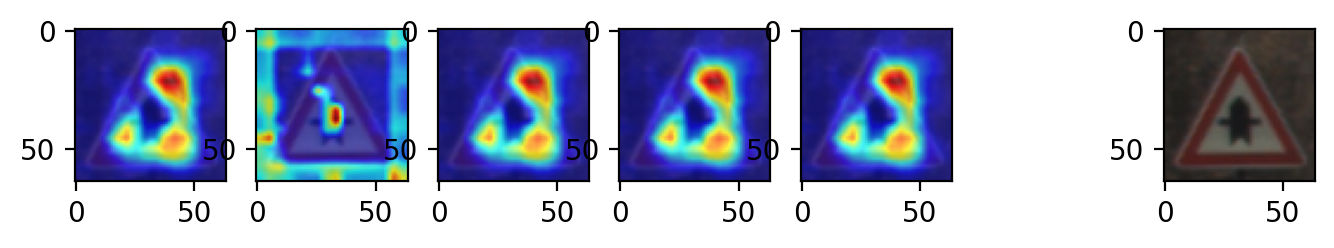

In [61]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import torch 
import numpy as np 
import matplotlib.pyplot as plt 

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=200)

index = 4

# print(torch.load('../best_model_GT (7).pth'))
model = torch.load('../best_model_GT (7).pth')
model2 = DoGNet(num_classes=43)
model2.load_state_dict(model.state_dict())
model = model2
target_layers = [model.dogs[-1], model.conv9]

model.eval()
# input_tensor = torch.randn((1, 3, 224, 224))

input_tensor, label, np_image = test_dataset[index]

# We have to specify the target we want to generate the CAM for.
targets = [ClassifierOutputTarget(0)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
  # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
  grayscale_cam = cam(input_tensor=input_tensor[None], targets=targets)
  # In this example grayscale_cam has only one image in the batch:
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(np_image / 255., grayscale_cam, use_rgb=True)
  # You can also get the model outputs without having to redo inference
  model_outputs = cam.outputs


plt.subplot(1, 7, 1)
plt.imshow(visualization)

targets = [ClassifierOutputTarget(1)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
  # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
  grayscale_cam = cam(input_tensor=input_tensor[None], targets=targets)
  # In this example grayscale_cam has only one image in the batch:
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(np_image / 255., grayscale_cam, use_rgb=True)
  # You can also get the model outputs without having to redo inference
  model_outputs = cam.outputs


plt.subplot(1, 7, 2)
plt.imshow(visualization)

targets = [ClassifierOutputTarget(2)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
  # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
  grayscale_cam = cam(input_tensor=input_tensor[None], targets=targets)
  # In this example grayscale_cam has only one image in the batch:
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(np_image / 255., grayscale_cam, use_rgb=True)
  # You can also get the model outputs without having to redo inference
  model_outputs = cam.outputs


plt.subplot(1, 7, 3)
plt.imshow(visualization)

targets = [ClassifierOutputTarget(3)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
  # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
  grayscale_cam = cam(input_tensor=input_tensor[None], targets=targets)
  # In this example grayscale_cam has only one image in the batch:
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(np_image / 255., grayscale_cam, use_rgb=True)
  # You can also get the model outputs without having to redo inference
  model_outputs = cam.outputs


plt.subplot(1, 7, 4)
plt.imshow(visualization)

targets = [ClassifierOutputTarget(4)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
  # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
  grayscale_cam = cam(input_tensor=input_tensor[None], targets=targets)
  # In this example grayscale_cam has only one image in the batch:
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(np_image / 255., grayscale_cam, use_rgb=True)
  # You can also get the model outputs without having to redo inference
  model_outputs = cam.outputs

plt.subplot(1, 7, 5)
plt.imshow(visualization)


# model = torch.load('../best_model_GT (7).pth')
# model.eval()

# targets = [ClassifierOutputTarget(label)]

# # Construct the CAM object once, and then re-use it on many images.
# with GradCAM(model=model, target_layers=target_layers) as cam:
#   # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
#   grayscale_cam = cam(input_tensor=input_tensor[None], targets=targets)
#   # In this example grayscale_cam has only one image in the batch:
#   grayscale_cam = grayscale_cam[0, :]
#   visualization = show_cam_on_image(np_image / 255., grayscale_cam, use_rgb=True)
#   # You can also get the model outputs without having to redo inference
#   model_outputs = cam.outputs

# plt.subplot(1, 7, 6)
# plt.imshow(visualization)

plt.subplot(1, 7, 7)
plt.imshow(np_image)